# Customer Segmenation using K-means Clustering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## for customer segmenation we will mainly focus on the income and the spending score , 

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
X = df[['Annual Income (k$)',
       'Spending Score (1-100)']]

In [39]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## lets visualize the scatter plot

Text(0, 0.5, 'Spending Score')

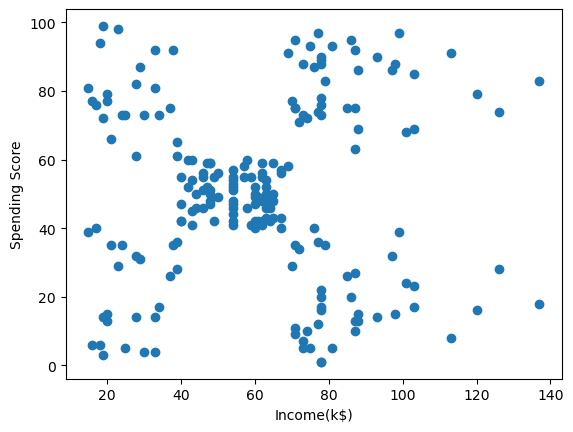

In [9]:
plt.scatter(x=Income,y=Expenditure)
plt.xlabel("Income(k$)")
plt.ylabel('Spending Score')

## we will use K Means++ as our data in numerical.

In [11]:
from sklearn.cluster import KMeans

In [40]:
X = X.to_numpy()

In [53]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [56]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)

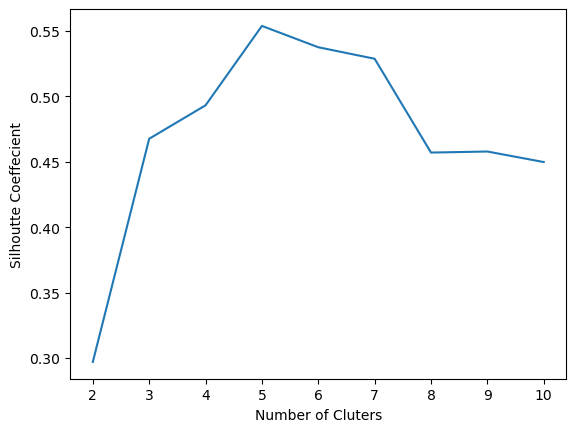

In [57]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

## as you can see the silhoeutte score is the highest for 5 clusters .So we will select n_cluster parameter as 5

In [47]:
kmeans = KMeans(n_clusters=5,init='k-means++')

In [48]:
y=kmeans.fit_predict(X)

Text(0, 0.5, 'Spending Score')

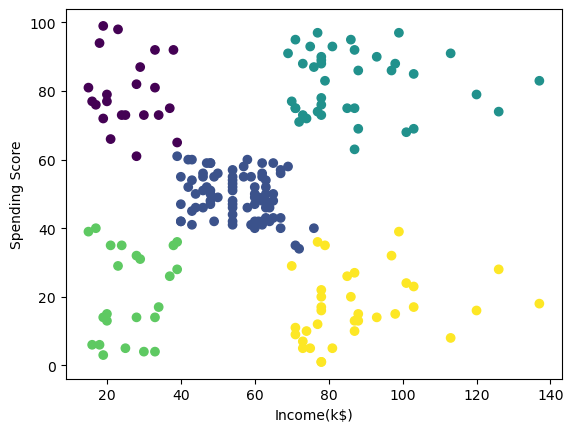

In [58]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Income(k$)")
plt.ylabel('Spending Score')

## as you can see we have clustered the datapoints .

## Now lets conclude somethings ->
- Light Green : people with less income and less expenses.
- Purple : People with less income bt high expenditures
- Blue : People with average income and Average Expenditures . 
- Yellow : People with high income but less expenses .
- Deep Green : people with high income and high expenditures

## In Total we have 5 categories of people .
## based on the product a company launches e-commerce websites can recommend products to the people .